In [203]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [204]:
## importing and setting the column names for the data
col_names = ['UniqueID','ParcelID','LandUse','SalePrice','LegalReference','SoldAsVacant','OwnerName','Acreage','LandValue','BuildingValue','TotalValue','YearBuilt','Bedrooms','FullBath','HalfBath','SaleDate','PropertyAddress','PropertyCity','OwnerAddress','OwnerCity','OwnerState']
df = pd.read_csv('CleanedData.csv',names=col_names)

In [205]:
# preview data
df.head()

UniqueID         ParcelID        LandUse  SalePrice    LegalReference  \
0      2045  007 00 0 125.00  SINGLE FAMILY     240000  20130412-0036474   
1     16918  007 00 0 130.00  SINGLE FAMILY     366000  20140619-0053768   
2     54582  007 00 0 138.00  SINGLE FAMILY     435000  20160927-0101718   
3     43070  007 00 0 143.00  SINGLE FAMILY     255000  20160129-0008913   
4     22714  007 00 0 149.00  SINGLE FAMILY     278000  20141015-0095255   

  SoldAsVacant                           OwnerName  Acreage  LandValue  \
0           No           FRAZIER, CYRENTHA LYNETTE      2.3    50000.0   
1           No             BONER, CHARLES & LESLIE      3.5    50000.0   
2           No           WILSON, JAMES E. & JOANNE      2.9    50000.0   
3           No            BAKER, JAY K. & SUSAN E.      2.6    50000.0   
4           No  POST, CHRISTOPHER M. & SAMANTHA C.      2.0    50000.0   

   BuildingValue  ...  YearBuilt  Bedrooms  FullBath  HalfBath    SaleDate  \
0       168200.0  ...     1986.0       3.0       3.0       0.0  2013-04-09   
1       264100.0  ...     1998.0       3.0       3.0       2.0  2014-06-10   
2       216200.0  ...     1987.0       4.0       3.0       0.0  2016-09-26   
3       147300.0  ...     1985.0       3.0       3.0       0.0  2016-01-29   
4       152300.0  ...     1984.0       4.0       3.0       0.0  2014-10-10   

      PropertyAddress     PropertyCity        OwnerAddress        OwnerCity  \
0  1808  FOX CHASE DR   GOODLETTSVILLE  1808  FOX CHASE DR   GOODLETTSVILLE   
1  1832  FOX CHASE DR   GOODLETTSVILLE  1832  FOX CHASE DR   GOODLETTSVILLE   
2  1864 FOX CHASE  DR   GOODLETTSVILLE  1864  FOX CHASE DR   GOODLETTSVILLE   
3  1853  FOX CHASE DR   GOODLETTSVILLE  1853  FOX CHASE DR   GOODLETTSVILLE   
4  1829  FOX CHASE DR   GOODLETTSVILLE  1829  FOX CHASE DR   GOODLETTSVILLE   

  OwnerState  
0         TN  
1         TN  
2         TN  
3         TN  
4         TN  

[5 rows x 21 columns]

In [206]:
#data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56373 entries, 0 to 56372
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56373 non-null  int64  
 1   ParcelID         56373 non-null  object 
 2   LandUse          56373 non-null  object 
 3   SalePrice        56373 non-null  int64  
 4   LegalReference   56373 non-null  object 
 5   SoldAsVacant     56373 non-null  object 
 6   OwnerName        25215 non-null  object 
 7   Acreage          25969 non-null  float64
 8   LandValue        25969 non-null  float64
 9   BuildingValue    25969 non-null  float64
 10  TotalValue       25969 non-null  float64
 11  YearBuilt        24118 non-null  float64
 12  Bedrooms         24112 non-null  float64
 13  FullBath         24230 non-null  float64
 14  HalfBath         24099 non-null  float64
 15  SaleDate         56373 non-null  object 
 16  PropertyAddress  56373 non-null  object 
 17  PropertyCity

In [207]:
## checking column data types
df.dtypes

UniqueID             int64
ParcelID            object
LandUse             object
SalePrice            int64
LegalReference      object
SoldAsVacant        object
OwnerName           object
Acreage            float64
LandValue          float64
BuildingValue      float64
TotalValue         float64
YearBuilt          float64
Bedrooms           float64
FullBath           float64
HalfBath           float64
SaleDate            object
PropertyAddress     object
PropertyCity        object
OwnerAddress        object
OwnerCity           object
OwnerState          object
dtype: object

In [208]:
## dropping unneeded columns
df.drop(['UniqueID','ParcelID','LegalReference','OwnerAddress','OwnerCity','OwnerState'],axis=1,inplace=True)

In [209]:
## checking data for columns
df.describe()

SalePrice       Acreage     LandValue  BuildingValue    TotalValue  \
count  5.637300e+04  25969.000000  2.596900e+04   2.596900e+04  2.596900e+04   
mean   3.275230e+05      0.499375  6.914498e+04   1.608887e+05  2.325590e+05   
std    9.306573e+05      1.571793  1.061174e+05   2.069547e+05  2.812663e+05   
min    5.000000e+01      0.010000  1.000000e+02   0.000000e+00  1.000000e+02   
25%    1.350000e+05      0.180000  2.100000e+04   7.600000e+04  1.028000e+05   
50%    2.057000e+05      0.270000  2.880000e+04   1.114000e+05  1.486000e+05   
75%    3.290000e+05      0.450000  6.000000e+04   1.808000e+05  2.686000e+05   
max    5.427806e+07    160.060000  2.772000e+06   1.297180e+07  1.394040e+07   

          YearBuilt      Bedrooms      FullBath      HalfBath  
count  24118.000000  24112.000000  24230.000000  24099.000000  
mean    1963.731653      3.090246      1.886339      0.283912  
std       26.540435      0.853152      0.961880      0.487944  
min     1799.000000      0.000000      0.000000      0.000000  
25%     1948.000000      3.000000      1.000000      0.000000  
50%     1960.000000      3.000000      2.000000      0.000000  
75%     1983.000000      3.000000      2.000000      1.000000  
max     2017.000000     11.000000     10.000000      3.000000

In [210]:
df.isnull().sum()

LandUse                0
SalePrice              0
SoldAsVacant           0
OwnerName          31158
Acreage            30404
LandValue          30404
BuildingValue      30404
TotalValue         30404
YearBuilt          32255
Bedrooms           32261
FullBath           32143
HalfBath           32274
SaleDate               0
PropertyAddress        0
PropertyCity           0
dtype: int64

In [211]:
## checking na value %s of columns
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

LandUse - 0.0%
SalePrice - 0.0%
SoldAsVacant - 0.0%
OwnerName - 0.5527114043957213%
Acreage - 0.539336207049474%
LandValue - 0.539336207049474%
BuildingValue - 0.539336207049474%
TotalValue - 0.539336207049474%
YearBuilt - 0.5721710748053146%
Bedrooms - 0.5722775087364519%
FullBath - 0.5701843080907527%
HalfBath - 0.5725081155872492%
SaleDate - 0.0%
PropertyAddress - 0.0%
PropertyCity - 0.0%


In [212]:
## filling na values
df['OwnerName'] = df['OwnerName'].fillna('unkown')

##need to drop na float/int values because replacing them w/ means/other values destorys correlation relationship w/ SalePrice
df.dropna(inplace=True)

In [213]:
## checking na value %s of columns
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,pct_missing))

LandUse - 0.0%
SalePrice - 0.0%
SoldAsVacant - 0.0%
OwnerName - 0.0%
Acreage - 0.0%
LandValue - 0.0%
BuildingValue - 0.0%
TotalValue - 0.0%
YearBuilt - 0.0%
Bedrooms - 0.0%
FullBath - 0.0%
HalfBath - 0.0%
SaleDate - 0.0%
PropertyAddress - 0.0%
PropertyCity - 0.0%


In [214]:
df = df.loc[df['SalePrice']<1500000]

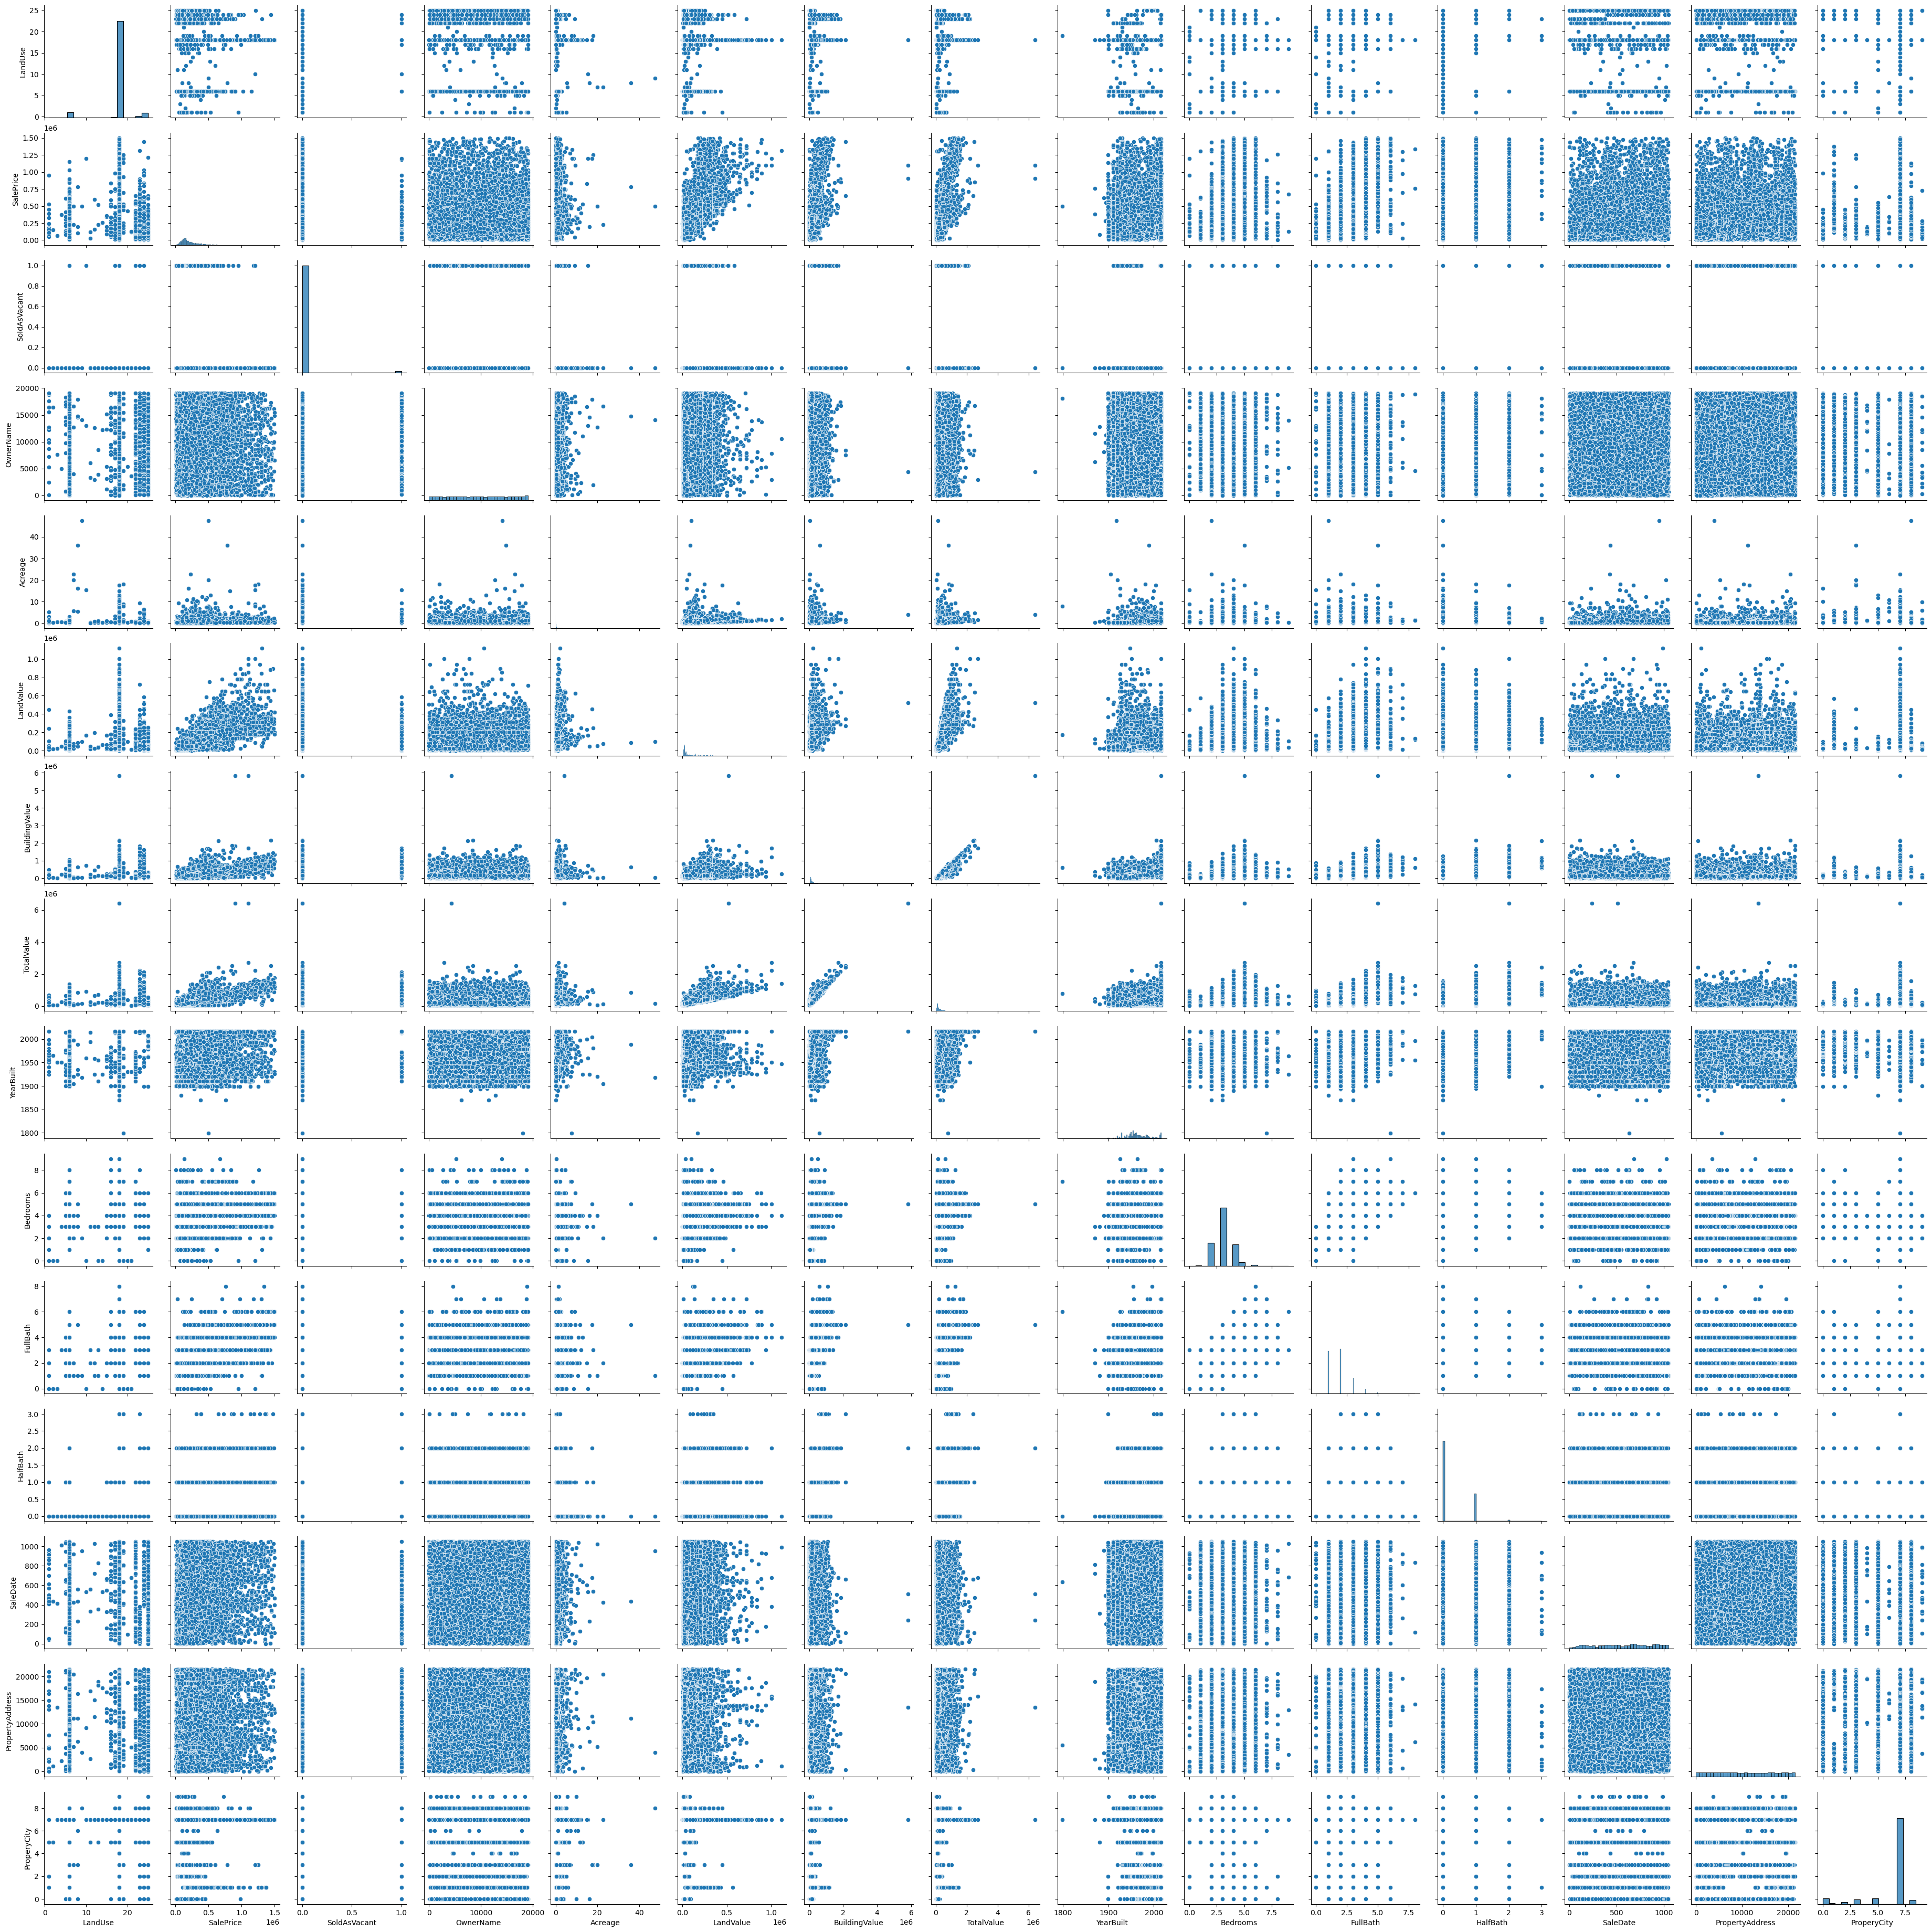

In [160]:
sns.pairplot(df)

C:\Users\matth\AppData\Local\Temp\ipykernel_24048\3168171692.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

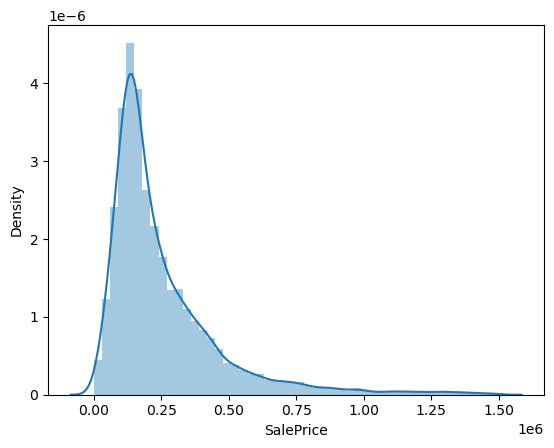

In [161]:
sns.distplot(df['SalePrice'])

In [162]:
df.corr()

LandUse  SalePrice  SoldAsVacant  OwnerName   Acreage  \
LandUse          1.000000  -0.016820      0.162795  -0.015384 -0.033295   
SalePrice       -0.016820   1.000000     -0.047842   0.006704  0.224715   
SoldAsVacant     0.162795  -0.047842      1.000000   0.001923  0.008246   
OwnerName       -0.015384   0.006704      0.001923   1.000000  0.002631   
Acreage         -0.033295   0.224715      0.008246   0.002631  1.000000   
LandValue       -0.004600   0.766607      0.047649   0.008528  0.275774   
BuildingValue    0.055362   0.692906      0.171886  -0.002644  0.166476   
TotalValue       0.038174   0.807879      0.143286   0.001525  0.234164   
YearBuilt        0.137667   0.016596      0.238146  -0.007429  0.015878   
Bedrooms        -0.214554   0.383165      0.072014  -0.000980  0.131602   
FullBath        -0.091441   0.565960      0.121718  -0.000331  0.189881   
HalfBath         0.132804   0.237024      0.123256  -0.005006  0.030352   
SaleDate         0.005957   0.091297     -0.061122   0.006129  0.003010   
PropertyAddress  0.026751   0.005487     -0.024603  -0.009578  0.070236   
ProperyCity     -0.045043   0.172847      0.035798   0.004887 -0.022775   

                 LandValue  BuildingValue  TotalValue  YearBuilt  Bedrooms  \
LandUse          -0.004600       0.055362    0.038174   0.137667 -0.214554   
SalePrice         0.766607       0.692906    0.807879   0.016596  0.383165   
SoldAsVacant      0.047649       0.171886    0.143286   0.238146  0.072014   
OwnerName         0.008528      -0.002644    0.001525  -0.007429 -0.000980   
Acreage           0.275774       0.166476    0.234164   0.015878  0.131602   
LandValue         1.000000       0.552097    0.796009  -0.034126  0.316811   
BuildingValue     0.552097       1.000000    0.943523   0.218936  0.425040   
TotalValue        0.796009       0.943523    1.000000   0.143787  0.433757   
YearBuilt        -0.034126       0.218936    0.143787   1.000000  0.161732   
Bedrooms          0.316811       0.425040    0.433757   0.161732  1.000000   
FullBath          0.499763       0.620471    0.647997   0.297495  0.591636   
HalfBath          0.160726       0.367697    0.329915   0.255418  0.172680   
SaleDate         -0.061852      -0.080170   -0.082728   0.001860 -0.041561   
PropertyAddress   0.023145       0.002378    0.010628   0.118913  0.023153   
ProperyCity       0.153700       0.136324    0.159837  -0.230278 -0.006396   

                 FullBath  HalfBath  SaleDate  PropertyAddress  ProperyCity  
LandUse         -0.091441  0.132804  0.005957         0.026751    -0.045043  
SalePrice        0.565960  0.237024  0.091297         0.005487     0.172847  
SoldAsVacant     0.121718  0.123256 -0.061122        -0.024603     0.035798  
OwnerName       -0.000331 -0.005006  0.006129        -0.009578     0.004887  
Acreage          0.189881  0.030352  0.003010         0.070236    -0.022775  
LandValue        0.499763  0.160726 -0.061852         0.023145     0.153700  
BuildingValue    0.620471  0.367697 -0.080170         0.002378     0.136324  
TotalValue       0.647997  0.329915 -0.082728         0.010628     0.159837  
YearBuilt        0.297495  0.255418  0.001860         0.118913    -0.230278  
Bedrooms         0.591636  0.172680 -0.041561         0.023153    -0.006396  
FullBath         1.000000  0.051051 -0.059460         0.023295    -0.009033  
HalfBath         0.051051  1.000000 -0.024621         0.027034     0.007409  
SaleDate        -0.059460 -0.024621  1.000000         0.007935    -0.029246  
PropertyAddress  0.023295  0.027034  0.007935         1.000000    -0.047376  
ProperyCity     -0.009033  0.007409 -0.029246        -0.047376     1.000000

<Axes: >

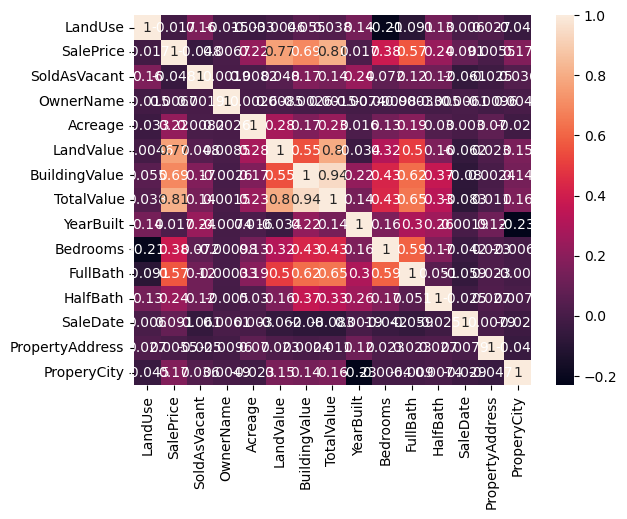

In [163]:
sns.heatmap(df.corr(),annot=True)

In [215]:
## creating a numerized dataframe for non int/float features

df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

In [216]:
df_numerized.head()

LandUse  SalePrice  SoldAsVacant  OwnerName  Acreage  LandValue  \
0       17     240000             0       5736      2.3    50000.0   
1       17     366000             0       1751      3.5    50000.0   
2       17     435000             0      18368      2.9    50000.0   
3       17     255000             0        893      2.6    50000.0   
4       17     278000             0      13421      2.0    50000.0   

   BuildingValue  TotalValue  YearBuilt  Bedrooms  FullBath  HalfBath  \
0       168200.0    235700.0     1986.0       3.0       3.0       0.0   
1       264100.0    319000.0     1998.0       3.0       3.0       2.0   
2       216200.0    298000.0     1987.0       4.0       3.0       0.0   
3       147300.0    197300.0     1985.0       3.0       3.0       0.0   
4       152300.0    202300.0     1984.0       4.0       3.0       0.0   

   SaleDate  PropertyAddress  PropertyCity  
0        73             5264             2  
1       389             5433             2  
2      1020             5462             2  
3       837             5458             2  
4       483             5422             2

<Axes: >

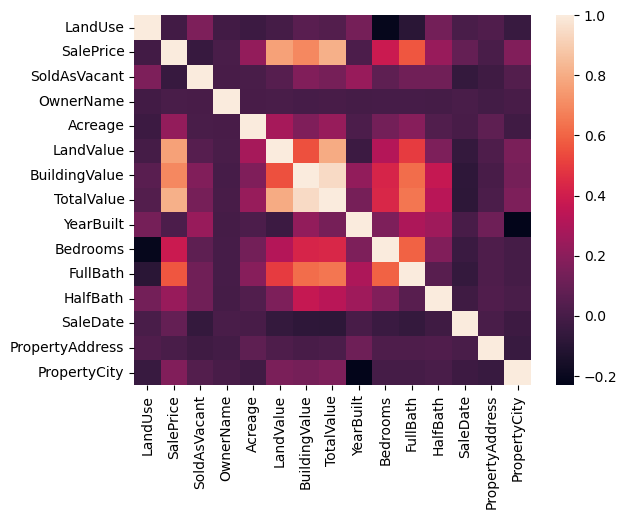

In [217]:
sns.heatmap(df_numerized.corr())

## from this correlation heatmap we can see that there are multiple features that have a significant correlation to SalePrice

In [218]:
## showing the correlation values of features for SalePrice
corr_matrix = df_numerized.corr()
corr_pairs = corr_matrix.unstack()
corr_pairs['SalePrice']

LandUse           -0.016820
SalePrice          1.000000
SoldAsVacant      -0.047842
OwnerName          0.006702
Acreage            0.224715
LandValue          0.766607
BuildingValue      0.692906
TotalValue         0.807879
YearBuilt          0.016596
Bedrooms           0.383165
FullBath           0.565960
HalfBath           0.237024
SaleDate           0.091304
PropertyAddress    0.005438
PropertyCity       0.172847
dtype: float64

In [219]:
## showing features that have a high correlation with SalePrice
high_corr = corr_pairs[(corr_pairs)>.5]
high_corr['SalePrice']

SalePrice        1.000000
LandValue        0.766607
BuildingValue    0.692906
TotalValue       0.807879
FullBath         0.565960
dtype: float64

In [220]:
## training a linear regression model

In [314]:
# splitting the data into X & Y
X = df_numerized.drop(columns=['SalePrice'],axis=0,inplace=False)
y = df_numerized['SalePrice']

In [315]:
## splitting into train & test datasets
from sklearn.model_selection import train_test_split

In [316]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [317]:
from sklearn.linear_model import LinearRegression

In [318]:
lm = LinearRegression()

In [319]:
## fitting the model to the training data

lm.fit(X_train,y_train)

LinearRegression()

In [320]:
print(lm.intercept_)

754926.4208476467


In [321]:
cdf = pd.DataFrame(lm.coef_,X.columns,columns=['Coeff'])

In [322]:
cdf

Coeff
LandUse             350.776853
SoldAsVacant    -226082.965406
OwnerName             0.062169
Acreage             270.273644
LandValue            -0.935694
BuildingValue        -1.699612
TotalValue            2.176312
YearBuilt          -422.341660
Bedrooms           6080.209618
FullBath          26307.915750
HalfBath          21764.418350
SaleDate            110.318880
PropertyAddress      -0.243855
PropertyCity       4896.246407

In [323]:
## Predictions

In [324]:
predictions = lm.predict(X_test)

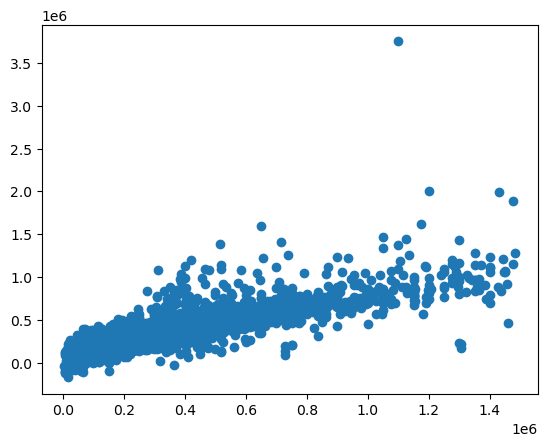

In [325]:
plt.scatter(y_test,predictions)

C:\Users\matth\AppData\Local\Temp\ipykernel_24048\3491059997.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((y_test-predictions))


<Axes: xlabel='SalePrice', ylabel='Density'>

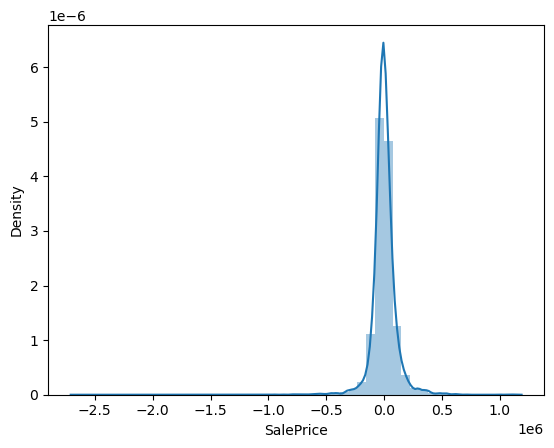

In [326]:
sns.distplot((y_test-predictions))

In [327]:
from sklearn import metrics

In [328]:
print(metrics.mean_absolute_error(y_test,predictions))
print(metrics.mean_squared_error(y_test,predictions))
print(np.sqrt(metrics.mean_squared_error(y_test,predictions)))

64965.10702623014
11942421076.143839
109281.38485645138
